## Desenvolvimento da 1a Etapa

### Diretório das imagens

In [ ]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Carregar a imagem
imagem = sitk.ReadImage("images_filtered/IXI002-Guys-0828-T1.nii.gz")
atlas_csf = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_csf.nii.gz")


# Converter para array numpy
array_imagem = sitk.GetArrayFromImage(imagem)

data_min = np.min(array_imagem)
data_max = np.max(array_imagem)
normalized_data = (array_imagem - data_min) / (data_max - data_min) * 255
normalized_data = normalized_data.astype(np.uint8)



array_atlas = sitk.GetArrayFromImage(atlas_csf)

indice_fatia = array_imagem.shape[0] // 2  
fatia_img = array_imagem[indice_fatia, :, :]

indice_fatia = array_atlas.shape[0] // 2  
fatia_atlas = array_atlas[indice_fatia, :, :]


# Exibir a imagem
plt.imshow(fatia_img, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()


# Exibir a imagem
plt.imshow(fatia_atlas, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

In [45]:
#imagem que vai ser usada como teste
imagem = sitk.ReadImage("images_filtered/IXI002-Guys-0828-T1.nii.gz")

# Converter para array numpy
img_np = sitk.GetArrayFromImage(imagem)

data_min = np.min(img_np)
data_max = np.max(img_np)
normalized_data = (img_np - data_min) / (data_max - data_min) * 255
normalized_data = normalized_data.astype(np.uint8)


atlas_csf = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_csf.nii.gz")
atlas_gm = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_gm.nii.gz")
atlas_wm = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_wm.nii.gz")

atlas_csf_array = sitk.GetArrayFromImage(atlas_csf)
atlas_gm_array = sitk.GetArrayFromImage(atlas_gm)
atlas_wm_array = sitk.GetArrayFromImage(atlas_wm)


binary_array_csf = (atlas_csf_array > 0.98).astype(np.uint8)
binary_array_gm = (atlas_gm_array > 0.98).astype(np.uint8)
binary_array_wm = (atlas_wm_array > 0.98).astype(np.uint8)

# Converter de volta para imagem SimpleITK
binary_image_csf = sitk.GetImageFromArray(binary_array_csf)
binary_image_csf.CopyInformation(atlas_csf)  # Mantém metadados da imagem original

binary_image_gm = sitk.GetImageFromArray(binary_array_gm)
binary_image_gm.CopyInformation(atlas_gm)  # Mantém metadados da imagem original

binary_image_wm = sitk.GetImageFromArray(binary_array_wm)
binary_image_wm.CopyInformation(atlas_wm)  # Mantém metadados da imagem original


# num_pixels_1 = np.count_nonzero(binary_array)

# print(f"Número de pixels com valor 1: {num_pixels_1}")

sitk.WriteImage(binary_image_csf, "mni_csf_binary.nii.gz")
sitk.WriteImage(binary_image_gm, "mni_gm_binary.nii.gz")
sitk.WriteImage(binary_image_wm, "mni_wm_binary.nii.gz")

# Exibir a imagem
#plt.imshow(binary_image_wm, cmap="gray")  # Use "gray" para imagens em preto e branco
#plt.axis("off")  # Remove os eixos
#plt.show()


In [46]:
image_norm = sitk.GetImageFromArray(normalized_data)



# num_pixels_1 = np.count_nonzero(binary_array)

# print(f"Número de pixels com valor 1: {num_pixels_1}")

sitk.WriteImage(image_norm, "image_norm.nii.gz")

In [47]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Carregar a imagem
imagem = sitk.ReadImage("images_filtered/IXI002-Guys-0828-T1.nii.gz")
atlas_csf = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_csf.nii.gz")


binary_atlas_csf = sitk.ReadImage("mni_csf_binary.nii.gz")
binary_atlas_gm = sitk.ReadImage("mni_gm_binary.nii.gz")
binary_atlas_wm = sitk.ReadImage("mni_wm_binary.nii.gz")

#img_sitk = sitk.ReadImage("images_filtered/IXI002-Guys-0828-T1.nii.gz")
#img_np = sitk.GetArrayFromImage(img_sitk)

mask_np_csf = sitk.GetArrayFromImage(binary_atlas_csf)

# Garantir que a máscara seja binária (0 e 1)
mask_np_csf = (mask_np_csf > 0).astype(np.uint8)


mask_np_gm = sitk.GetArrayFromImage(binary_atlas_gm)

# Garantir que a máscara seja binária (0 e 1)
mask_np_gm = (mask_np_gm > 0).astype(np.uint8)


mask_np_wm = sitk.GetArrayFromImage(binary_atlas_wm)

# Garantir que a máscara seja binária (0 e 1)
mask_np_wm = (mask_np_wm > 0).astype(np.uint8)

# Multiplicar elemento a elemento
result_np_csf = (normalized_data * mask_np_csf)
result_np_gm = (normalized_data * mask_np_gm)
result_np_wm = (normalized_data * mask_np_wm)

# Converter de volta para SimpleITK
result_sitk_csf = sitk.GetImageFromArray(result_np_csf)
result_sitk_csf.CopyInformation(imagem)  # Copiar metadados da imagem original

result_sitk_gm = sitk.GetImageFromArray(result_np_gm)
result_sitk_gm.CopyInformation(imagem)  # Copiar metadados da imagem original

result_sitk_wm = sitk.GetImageFromArray(result_np_wm)
result_sitk_wm.CopyInformation(imagem)  # Copiar metadados da imagem original

# Salvar a nova imagem
sitk.WriteImage(result_sitk_csf, "result_sitk_csf.nii.gz")
sitk.WriteImage(result_sitk_gm, "result_sitk_gm.nii.gz")
sitk.WriteImage(result_sitk_wm, "result_sitk_wm.nii.gz")




In [48]:
result_atlas_csf = sitk.ReadImage("result_sitk_csf.nii.gz")
result_atlas_gm = sitk.ReadImage("result_sitk_gm.nii.gz")
result_atlas_wm = sitk.ReadImage("result_sitk_wm.nii.gz")

result_np_csf = sitk.GetArrayFromImage(result_atlas_csf)
result_np_gm = sitk.GetArrayFromImage(result_atlas_gm)
result_np_wm = sitk.GetArrayFromImage(result_atlas_wm)



In [49]:
print(type(result_np_csf))
print(result_np_csf.shape)



<class 'numpy.ndarray'>
(150, 256, 256)


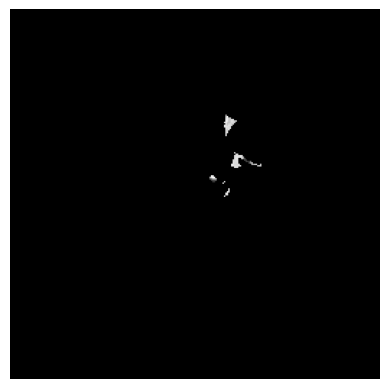

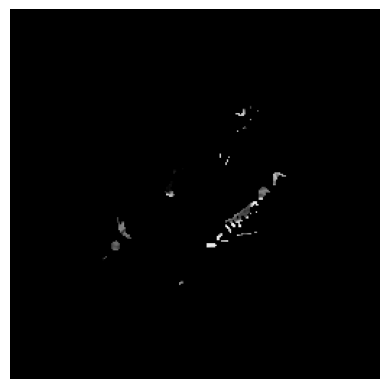

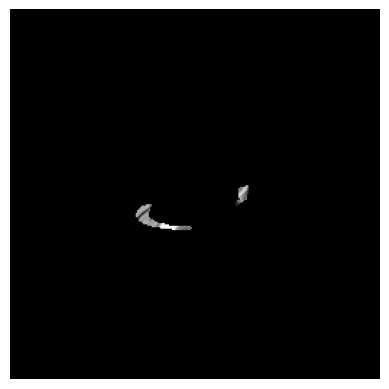

In [50]:


indice_fatia_csf = result_np_csf.shape[0] // 2  
fatia_img_csf = result_np_csf[indice_fatia_csf, :, :]

indice_fatia_gm = result_np_gm.shape[0] // 2  
fatia_img_gm = result_np_gm[indice_fatia_gm, :, :]

indice_fatia_wm = result_np_wm.shape[0] // 2  
fatia_img_wm = result_np_wm[indice_fatia_wm, :, :]


# Exibir a imagem
plt.imshow(fatia_img_csf, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

# Exibir a imagem
plt.imshow(fatia_img_gm, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

# Exibir a imagem
plt.imshow(fatia_img_wm, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

In [51]:
num_pixels_csf = np.count_nonzero(result_np_csf)
print(f"Número de pixels com valor maior que zero csf: {num_pixels_csf}\n")
num_pixels_gm = np.count_nonzero(result_np_gm)
print(f"Número de pixels com valor maior que zero gm: {num_pixels_gm}\n")
num_pixels_wm = np.count_nonzero(result_np_wm)
print(f"Número de pixels com valor maior que zero wm: {num_pixels_wm}\n")


Número de pixels com valor maior que zero csf: 3578

Número de pixels com valor maior que zero gm: 15009

Número de pixels com valor maior que zero wm: 140875



In [52]:
vetor_np_csf = result_np_csf[result_np_csf>0]
vetor_np_csf_mean = np.mean(vetor_np_csf)
print(f"Vetor final média csf: {vetor_np_csf_mean}.")

vetor_np_gm = result_np_gm[result_np_gm>0]
vetor_np_gm_mean = np.mean(vetor_np_gm)
print(f"Vetor final média gm: {vetor_np_gm_mean}.")


vetor_np_wm = result_np_wm[result_np_wm>0]
vetor_np_wm_mean = np.mean(vetor_np_wm)
print(f"Vetor final média wm: {vetor_np_wm_mean}.")



Vetor final média csf: 93.50223588596981.
Vetor final média gm: 69.17902591778267.
Vetor final média wm: 89.96611180124223.


In [53]:
print(f"Máximo csf: {np.max(result_np_csf)}, mínimo: {np.min(vetor_np_csf)}.")
print(f"Máximo gm: {np.max(result_np_gm)}, mínimo: {np.min(vetor_np_gm)}.")
print(f"Máximo wm: {np.max(result_np_wm)}, mínimo: {np.min(vetor_np_wm)}.")


Máximo csf: 127, mínimo: 1.
Máximo gm: 218, mínimo: 1.
Máximo wm: 207, mínimo: 1.


### Usar o kmeans com as três médias advindas das imagens. Fazer a clusterização da imagem original mediante as três médias.

Convergência atingida após 10 iterações.


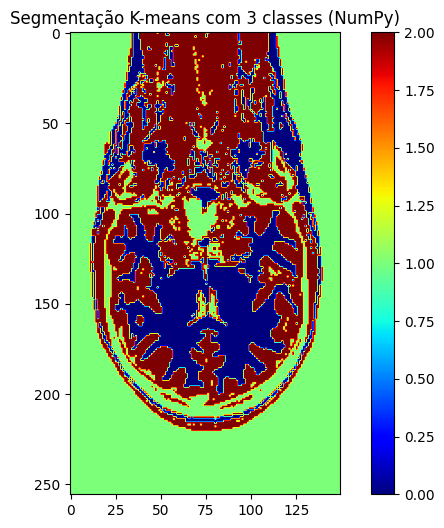

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# Carregar a imagem com Nibabel
image_path = "image_norm.nii.gz"  # Modifique para o caminho da sua imagem
nifti_image = nib.load(image_path)
image_data = nifti_image.get_fdata()  # Dados da imagem como um array NumPy

# Definir as médias fornecidas para os 3 clusters
cluster_means = np.array([vetor_np_csf_mean, vetor_np_gm_mean, vetor_np_wm_mean])  # Exemplo de médias para os 3 clusters

# Número de clusters
k = len(cluster_means)

# Inicializar aleatoriamente os centroids com base nas médias fornecidas
centroids = cluster_means.copy()

# Função para atribuir cada pixel ao cluster mais próximo
def assign_to_cluster(image_data, centroids):
    distances = np.abs(image_data[..., None] - centroids)  # Distância entre cada pixel e os centroids
    return np.argmin(distances, axis=-1)  # Atribui ao cluster com a menor distância

# Função para atualizar os centroids
def update_centroids(image_data, labels, k):
    new_centroids = np.zeros(k)
    for i in range(k):
        # Calcular a média dos pixels atribuídos a cada cluster
        new_centroids[i] = np.mean(image_data[labels == i])
    return new_centroids

# Número máximo de iterações
max_iters = 100
tolerance = 1e-4
prev_centroids = np.zeros_like(centroids)

# Iteração do K-means
for iteration in range(max_iters):
    # Atribuir os pixels aos clusters
    labels = assign_to_cluster(image_data, centroids)
    
    # Atualizar os centroids
    centroids = update_centroids(image_data, labels, k)
    
    # Verificar convergência (quando os centroids não mudam mais)
    if np.all(np.abs(centroids - prev_centroids) < tolerance):
        print(f"Convergência atingida após {iteration + 1} iterações.")
        break
    
    prev_centroids = centroids.copy()

# Exibir os resultados
segmented_image1 = labels

# Mostrar um corte da segmentação
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image1[int(segmented_image1.shape[0] / 2)], cmap="jet")
plt.title("Segmentação K-means com 3 classes (NumPy)")
plt.colorbar()
plt.show()

Convergência atingida após 26 iterações.


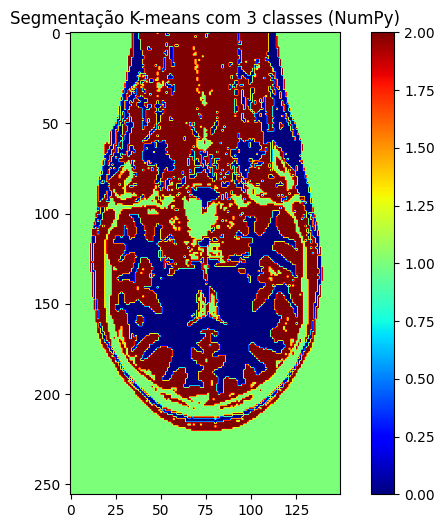

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# Carregar a imagem com Nibabel
image_path = "images_filtered\IXI002-Guys-0828-T1.nii.gz"  # Modifique para o caminho da sua imagem
nifti_image = nib.load(image_path)
image_data = nifti_image.get_fdata()  # Dados da imagem como um array NumPy

# Definir as médias fornecidas para os 3 clusters
cluster_means = np.array([vetor_np_csf_mean, vetor_np_gm_mean, vetor_np_wm_mean])  # Exemplo de médias para os 3 clusters

# Número de clusters
k = len(cluster_means)

# Inicializar aleatoriamente os centroids com base nas médias fornecidas
centroids = cluster_means.copy()

# Função para atribuir cada pixel ao cluster mais próximo
def assign_to_cluster(image_data, centroids):
    distances = np.abs(image_data[..., None] - centroids)  # Distância entre cada pixel e os centroids
    return np.argmin(distances, axis=-1)  # Atribui ao cluster com a menor distância

# Função para atualizar os centroids
def update_centroids(image_data, labels, k):
    new_centroids = np.zeros(k)
    for i in range(k):
        # Calcular a média dos pixels atribuídos a cada cluster
        new_centroids[i] = np.mean(image_data[labels == i])
    return new_centroids

# Número máximo de iterações
max_iters = 100
tolerance = 1e-4
prev_centroids = np.zeros_like(centroids)

# Iteração do K-means
for iteration in range(max_iters):
    # Atribuir os pixels aos clusters
    labels = assign_to_cluster(image_data, centroids)
    
    # Atualizar os centroids
    centroids = update_centroids(image_data, labels, k)
    
    # Verificar convergência (quando os centroids não mudam mais)
    if np.all(np.abs(centroids - prev_centroids) < tolerance):
        print(f"Convergência atingida após {iteration + 1} iterações.")
        break
    
    prev_centroids = centroids.copy()

# Exibir os resultados
segmented_image = labels

# Mostrar um corte da segmentação
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image[int(segmented_image.shape[0] / 2)], cmap="jet")
plt.title("Segmentação K-means com 3 classes (NumPy)")
plt.colorbar()
plt.show()

In [22]:
image_path = "images_filtered\IXI002-Guys-0828-T1.nii.gz"  # Modifique para o caminho da sua imagem
nifti_image = nib.load(image_path)
image_data = nifti_image.get_fdata() 

print(np.max(image_data))

1068.0


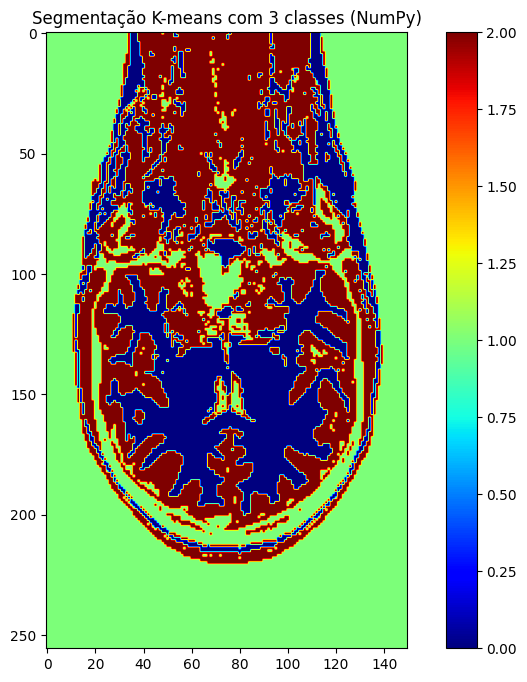

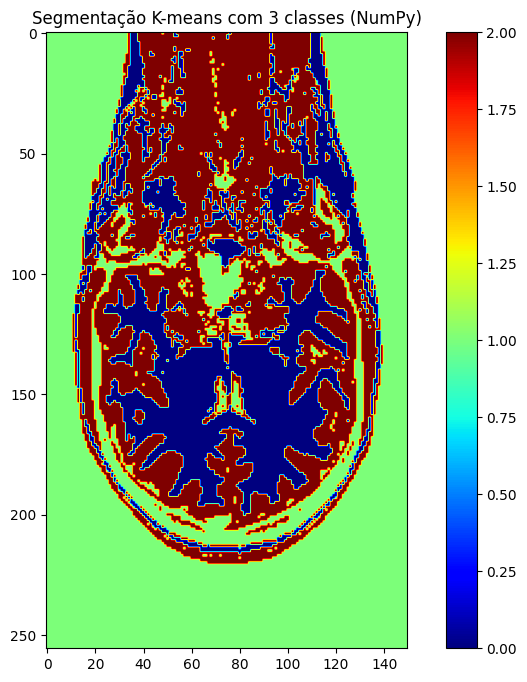

In [20]:
plt.figure(figsize=(10, 8))
plt.imshow(segmented_image[int(segmented_image.shape[0] / 2)], cmap="jet")
plt.title("Segmentação K-means com 3 classes (NumPy)")
plt.colorbar()
plt.show()


# Mostrar um corte da segmentação
plt.figure(figsize=(10, 8))
plt.imshow(segmented_image1[int(segmented_image1.shape[0] / 2)], cmap="jet")
plt.title("Segmentação K-means com 3 classes (NumPy)")
plt.colorbar()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Carregar a imagem
#image_path = "sua_imagem.nii"  # Modifique para o caminho da sua imagem
#image = sitk.ReadImage(image_path)
image_array = sitk.GetArrayFromImage(normalized_data)  # Converter para NumPy

# Converter para 1D (o K-means do sklearn espera uma matriz 2D)
pixels = image_array.flatten().reshape(-1, 1)

# Médias dos três clusters (defina os valores conforme necessário)
cluster_means = np.array([[vetor_np_csf_mean], [vetor_np_gm_mean], [vetor_np_wm_mean]])  # Exemplo de valores médios

# Aplicar K-means com centróides iniciais
kmeans = KMeans(n_clusters=3, init=cluster_means, n_init=1, random_state=42)
labels = kmeans.fit_predict(pixels)

# Remontar a imagem segmentada
segmented_image = labels.reshape(image_array.shape)

# Mostrar o resultado
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image[int(segmented_image.shape[0] / 2)], cmap="jet")  # Exibir um corte no meio
plt.title("Segmentação com K-means (3 classes)")
plt.colorbar()
plt.show()

In [18]:

num_pixels_csf = np.count_nonzero(fatia_img_csf)
print(f"Número de pixels com valor 1: {num_pixels_csf}\n")
num_pixels_gm = np.count_nonzero(fatia_img_gm)
print(f"Número de pixels com valor 1: {num_pixels_gm}\n")
num_pixels_wm = np.count_nonzero(fatia_img_wm)
print(f"Número de pixels com valor 1: {num_pixels_wm}\n")

Número de pixels com valor 1: 154

Número de pixels com valor 1: 416

Número de pixels com valor 1: 277



In [ ]:
# Normalizar para o intervalo [0, 255]
image_min = result_np_csf.min()
image_max = result_np_csf.max()
normalized_array = (result_np_csf - image_min) / (image_max - image_min) * 255

# Converter para inteiros (uint8)
image_uint8 = normalized_array.astype(np.uint8)

hist, bin_edges = np.histogram(image_uint8.flatten(), bins=256, range=(0, 255))

# Exibir histograma
plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], hist, width=1, color='blue', alpha=0.7)
plt.xlabel("Intensidade dos Pixels")
plt.ylabel("Frequência")
plt.title("Histograma da Imagem Normalizada (0-255)")
plt.grid(True)
plt.show()


Convergência atingida após 8 iterações.


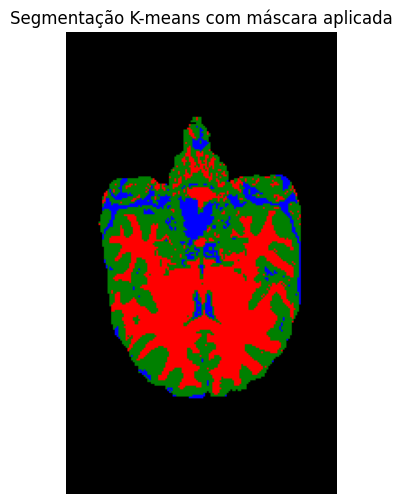


Volumes calculados:
Classe 0 (Vermelho): 712198.00 mm³
Classe 1 (Azul): 8346355.00 mm³
Classe 2 (Verde): 771847.00 mm³


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# --- Carregar a imagem original ---
image_path = "image_norm.nii.gz"  # Modifique para o caminho da sua imagem
nifti_image = nib.load(image_path)
image_data = nifti_image.get_fdata()  # Array NumPy da imagem

# --- Carregar a máscara ---
mask_path = "atlas_resampled\IXI002-Guys-0828-T1.nii.gz\mni_mask.nii.gz"  # Caminho do arquivo enviado
mask_nifti = nib.load(mask_path)
mask_data = mask_nifti.get_fdata()  # Array NumPy da máscara

# --- Aplicar a máscara (mantendo apenas a parte branca) ---
image_data[mask_data == 0] = 0

# Obter o tamanho do voxel em mm (dimensão do voxel)
voxel_size = np.prod(nifti_image.header.get_zooms())  # Multiplica (dx, dy, dz) para obter mm³

# Definir as médias fornecidas para os 3 clusters
cluster_means = np.array([[vetor_np_csf_mean], [vetor_np_gm_mean], [vetor_np_wm_mean]])  # Exemplo de valores médios

# Número de clusters
k = len(cluster_means)

# Inicializar centroides com as médias fornecidas
centroids = cluster_means.copy()

# Função para atribuir cada pixel ao cluster mais próximo
def assign_to_cluster(image_data, centroids):
    distances = np.abs(image_data[..., None] - centroids.flatten())
    return np.argmin(distances, axis=-1)

# Função para atualizar os centroids
def update_centroids(image_data, labels, k):
    new_centroids = np.zeros(k)
    for i in range(k):
        if np.any(labels == i):
            new_centroids[i] = np.mean(image_data[labels == i])
        else:
            new_centroids[i] = centroids[i]  # Mantém se não houver atualização
    return new_centroids

# Número máximo de iterações
max_iters = 100
tolerance = 1e-4
prev_centroids = np.zeros_like(centroids)

# Iteração do K-means
for iteration in range(max_iters):
    labels = assign_to_cluster(image_data, centroids)
    centroids = update_centroids(image_data, labels, k)
    
    if np.all(np.abs(centroids - prev_centroids) < tolerance):
        print(f"Convergência atingida após {iteration + 1} iterações.")
        break
    
    prev_centroids = centroids.copy()

# Criar uma imagem RGB para visualização
segmented_rgb = np.zeros((*labels.shape, 3), dtype=np.uint8)

# Definir as cores (R, G, B)
colors = {
    0: [255, 0, 0],      # Vermelho (Primeira classe)
    1: [0, 0, 255],      # Azul (Segunda classe)
    2: [0, 128, 0],  # Verde (Terceira classe)
}

# Atribuir cores aos pixels classificados
for class_id, color in colors.items():
    segmented_rgb[labels == class_id] = color

# Aplicar a máscara na segmentação (fundo preto)
segmented_rgb[mask_data == 0] = [0, 0, 0]

# Mostrar um corte da segmentação
slice_index = segmented_rgb.shape[0] // 2  # Pegar um corte no meio
plt.figure(figsize=(8, 6))
plt.imshow(segmented_rgb[slice_index])  # Mostrar a imagem colorida
plt.title("Segmentação K-means com máscara aplicada")
plt.axis("off")
plt.show()

# --- Cálculo do Volume ---
volumes = {}
for class_id in range(k):
    num_voxels = np.sum(labels == class_id)  # Contar número de voxels na classe
    volume_mm3 = num_voxels * voxel_size  # Multiplicar pelo tamanho do voxel
    volumes[class_id] = volume_mm3

# Exibir resultados
print("\nVolumes calculados:")
for class_id, volume in volumes.items():
    print(f"Classe {class_id} ({['Vermelho', 'Azul', 'Verde'][class_id]}): {volume:.2f} mm³")
